In [1]:
import sys; sys.path.insert(0, '.')
import visual
visual.display_meta_info()


| Meta          | Value          |
|:------------- | --------------:|
| Git revision  | 27d5a6a |
| System        | Linux (5.16.20-200.fc35.x86_64)           |
| Processor     | Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz          |
| Memory        | 16 GB          |


***RUNID**: optiplex-2022-07-01-155209*

| malloc | description |
|:--- |:--- |
|**sys**|System alloctor|
|**mi**|MiMalloc|
|**hd**|Hoard|
|**hoard**|Hoard (MallocKit)|


---

## Normalized Time:

***Mean over 10 invocations.***

malloc,sys,mi,hd,hoard
bench,,,,
alloc-test,1.208227,0.943207,1.0,1.071929
alloc-test1,1.197216,0.948509,1.0,1.051627
barnes,1.002676,0.991289,1.0,0.993496
cache-scratch,1.000147,0.999488,1.0,1.005693
cache-scratch1,0.999586,0.999747,1.0,1.0011
cfrac,1.051363,0.966231,1.0,1.002868
espresso,1.118359,0.983914,1.0,0.997829
glibc-simple,2.029074,0.929485,1.0,1.126286
glibc-thread,0.999287,0.99937,1.0,1.000164


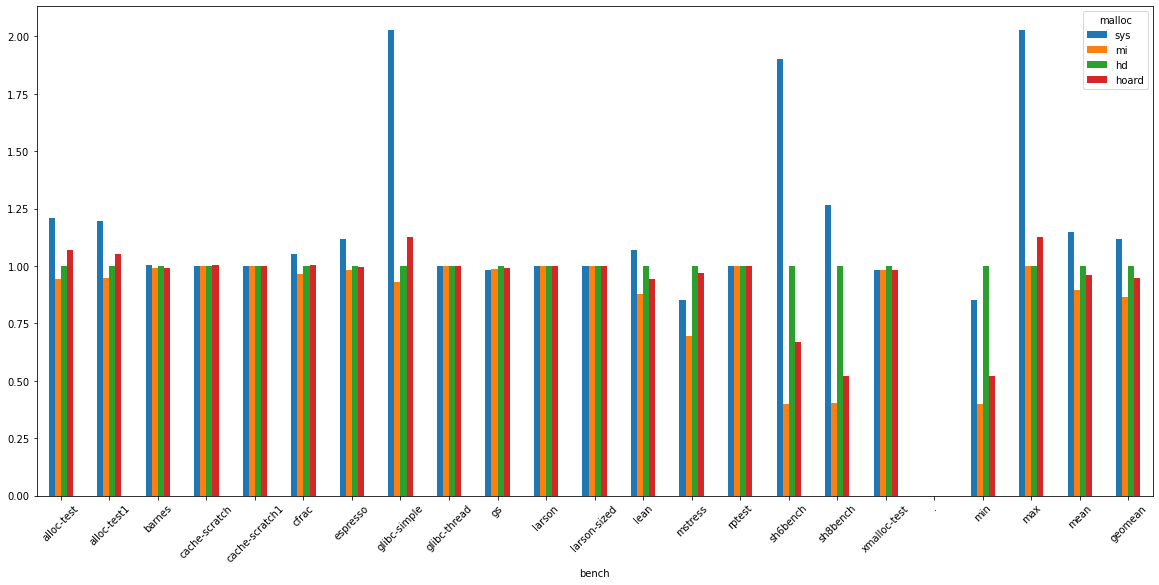

In [2]:
from visual import Pipeline

data, runid = Pipeline.load_results()
data, invocations = Pipeline.mean_over_invocation(data)
data = Pipeline.normalize(data, baseline = 'hd')
data = Pipeline.plot_bar(data, series='malloc', pivot='bench', value='duration_time', column_order = ['sys', 'mi', 'hd', 'hoard', 'buddy'])

visual.markdown(f'***RUNID**: {runid}*')
algorithms = '| malloc | description |\n|:--- |:--- |\n'
for a in data.columns.values:
    if a == 'buddy': algorithms += f'|**{a}**|Buddy allocator (MallocKit)|\n'
    elif a == 'hd': algorithms += f'|**{a}**|Hoard|\n'
    elif a == 'hoard': algorithms += f'|**{a}**|Hoard (MallocKit)|\n'
    elif a == 'mi': algorithms += f'|**{a}**|MiMalloc|\n'
    elif a == 'sys': algorithms += f'|**{a}**|System alloctor|\n'
visual.markdown(algorithms)
visual.markdown('---\n\n## Normalized Time:')
visual.markdown(f'***Mean over {invocations} invocations.***')

data